### Pandas怎样处理日期索引的缺失？
问题：
如果缺失了某一天的数据，导致数据不全怎么补充日期
dataframe.reindex 调整dataframe的索引以适应新的索引
dataframe,resample 可以对时间序列重新采样，支持补充缺失值

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.DataFrame({
    "pdate": ["2019-12-01", "2019-12-02", "2019-12-04", "2019-12-05"],
    "pv": [100, 200, 400, 500],
    "uv": [10, 20, 40, 50],
})

df  # 缺失了3号这一天的数据

,pdate,pv,uv
0,2019-12-01,100,10
1,2019-12-02,200,20
2,2019-12-04,400,40
3,2019-12-05,500,50


#### 方法一、pandas.reindex方法
1. 将df索引变成日期索引

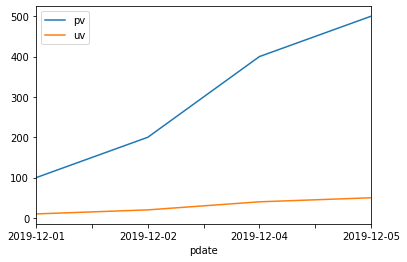

In [12]:
df.set_index(df["pdate"]).plot()  # 没有影响，能正常画出

In [10]:
df.index

RangeIndex(start=0, stop=4, step=1)

2. 使用pandas.reindex填充缺失的索引

In [14]:
pdates=pd.date_range(start="2019-12-01",end="2019-12-05")
df_new=df.set_index(df["pdate"]).reindex(pdates,fill_value=0)
df_new

,pdate,pv,uv
2019-12-01,0,0,0
2019-12-02,0,0,0
2019-12-03,0,0,0
2019-12-04,0,0,0
2019-12-05,0,0,0
